<h2><center>Implementation of stochastic grad and Adagrad</center></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

<h3>Stochastic Grad:</h3>

In [2]:
x = np.array([[1,1,2], [1,1,1], [1,1,2]])
y = np.array([11,8,10]).reshape(3, 1)
w = np.array([1,1,1]).reshape(3, 1)
step_size = 0.1

In [3]:
def prediction(x, w):
    pred = np.dot(x, w)
    return pred

def sq_loss(y, pred):
    loss = np.sum(np.square(y - pred))
    return loss

def gradient(y, pred, x):
    grad = -x * (y - pred)
    return grad

def adagrad_gradient(grad, hist, step_size, delta = 1e-3):
    hist = hist + np.multiply(grad, grad)
    step_size = step_size/(delta + np.sqrt(hist))
    return hist, step_size

def back_prop(x, y, w, step_size, adagrad = False, hist = 0):
    pred = prediction(x.copy(), w.copy())
    grad = gradient(y.copy(), pred.copy(), x.copy()).reshape(-1, 1)
    if(adagrad):
        hist, step_size = adagrad_gradient(grad, hist, step_size)
        w = w - np.multiply(step_size, grad)
    else:
        w = w - step_size * grad
    return hist, w

def plot(epochs, loss_list, hist_list = None):
    plt.figure(figsize = (15, 5))
    plt.plot(range(epochs + 1), loss_list, label = "loss GD")
    plt.xlabel("#epochs")
    plt.ylabel("squared loss")
    plt.title("Loss vs epochs")
    plt.legend()
    plt.grid()
    plt.show()
    if(hist_list != None):
        plt.figure(figsize = (15, 5))
        plt.plot(range(epochs), hist_list, label = "hist Adagrad")
        plt.xlabel("#epochs")
        plt.ylabel("hist value")
        plt.title("hist per epoch")
        plt.legend()
        plt.grid()
        plt.show()

<h3>20 Epochs stochastic grad descent</h3>

In [4]:
rows_x = range(len(x))
epochs = 20

"""Output variables"""
loss_list = []

"""initial loss and prediction"""
w = np.array([1,1,1]).reshape(3, 1)
pred = prediction(x.copy(), w.copy())
loss = sq_loss(y.copy(), pred.copy())
loss_list.append(loss)
print("Initial Prediciton is :", pred.T)
print("Initial loss is : {}\n".format(loss))

for epoch in range(epochs): 
    for row_index in rows_x:
        step_size = 0.1
        x_value = x[row_index]
        y_value = y[row_index]
        _, w = back_prop(x_value.copy(), y_value.copy(), w.copy(), step_size)
        if(epoch < 3):
            print("weights updated for {} epoch and {} row : {}".format(epoch + 1, row_index + 1, w.T))
    pred = prediction(x.copy(), w.copy())
    loss = sq_loss(y.copy(), pred.copy())
    if(epoch < 3):
        print("\nPrediciton after {} epoch : {}".format(epoch + 1, pred.T))
        print("Loss after {} epoch : {}\n".format(epoch + 1, loss))
    loss_list.append(loss)

Initial Prediciton is : [[4 3 4]]
Initial loss is : 110

weights updated for 1 epoch and 1 row : [[1.7 1.7 2.4]]
weights updated for 1 epoch and 2 row : [[1.92 1.92 2.62]]
weights updated for 1 epoch and 3 row : [[2.012 2.012 2.804]]

Prediciton after 1 epoch : [[9.632 6.828 9.632]]
Loss after 1 epoch : 3.380431999999994

weights updated for 2 epoch and 1 row : [[2.1488 2.1488 3.0776]]
weights updated for 2 epoch and 2 row : [[2.21128 2.21128 3.14008]]
weights updated for 2 epoch and 3 row : [[2.141008 2.141008 2.999536]]

Prediciton after 2 epoch : [[10.281088  7.281552 10.281088]]
Loss after 2 epoch : 1.1120124561920002

weights updated for 3 epoch and 1 row : [[2.2128992 2.2128992 3.1433184]]
weights updated for 3 epoch and 2 row : [[2.25598752 2.25598752 3.18640672]]
weights updated for 3 epoch and 3 row : [[2.16750867 2.16750867 3.00944902]]

Prediciton after 3 epoch : [[10.35391539  7.34446637 10.35391539]]
Loss after 3 epoch : 0.9724057680721381



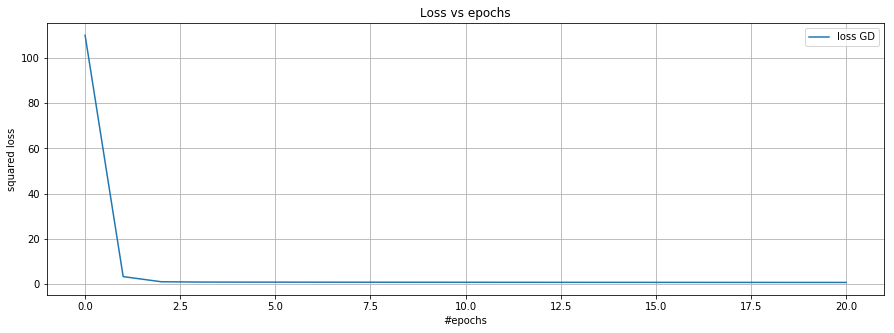

In [5]:
plot(epochs, loss_list, hist_list = None)

<h3>20 Epochs stochastic grad descent with adagrad</h3>

In [6]:
rows_x = range(len(x))
epochs = 40
hist = 0

"""Output variables"""
loss_list = []
hist_list = []

"""initial loss and prediction"""
w = np.array([1,1,1]).reshape(3, 1)
pred = prediction(x.copy(), w.copy())
loss = sq_loss(y.copy(), pred.copy())
loss_list.append(loss)
print("Initial Prediciton is :", pred.T)
print("Initial loss is : {}\n".format(loss))

for epoch in range(epochs): 
    for row_index in rows_x:
        x_value = x[row_index]
        y_value = y[row_index]
        hist, w = back_prop(x_value.copy(), y_value.copy(), w.copy(), step_size, adagrad = True, hist = hist)
        if(epoch < 3):
            print("weights updated for {} epoch and {} row : {}".format(epoch + 1, row_index + 1, w.T))
    pred = prediction(x.copy(), w.copy())
    loss = sq_loss(y.copy(), pred.copy())
    loss_list.append(loss)
    if(epoch < 3):
        print("\nPrediciton after {} epoch : {}".format(epoch + 1, pred.T))
        print("Loss after {} epoch : {}\n".format(epoch + 1, loss))
    hist_list.append(np.sum(hist))

Initial Prediciton is : [[4 3 4]]
Initial loss is : 110

weights updated for 1 epoch and 1 row : [[1.09998572 1.09998572 1.09999286]]
weights updated for 1 epoch and 2 row : [[1.15572282 1.15572282 1.13181677]]
weights updated for 1 epoch and 3 row : [[1.2098261  1.2098261  1.19102107]]

Prediciton after 1 epoch : [[4.80169434 3.61067327 4.80169434]]
Loss after 1 epoch : 84.70756379717685

weights updated for 2 epoch and 1 row : [[1.2624065  1.2624065  1.24705015]]
weights updated for 2 epoch and 2 row : [[1.29616778 1.29616778 1.26582042]]
weights updated for 2 epoch and 3 row : [[1.33244921 1.33244921 1.30554984]]

Prediciton after 2 epoch : [[5.27599811 3.97044827 5.27599811]]
Loss after 2 epoch : 71.31767870249152

weights updated for 3 epoch and 1 row : [[1.37163401 1.37163401 1.34781741]]
weights updated for 3 epoch and 2 row : [[1.3974837  1.3974837  1.36210164]]
weights updated for 3 epoch and 3 row : [[1.42589436 1.42589436 1.39322358]]

Prediciton after 3 epoch : [[5.63823586

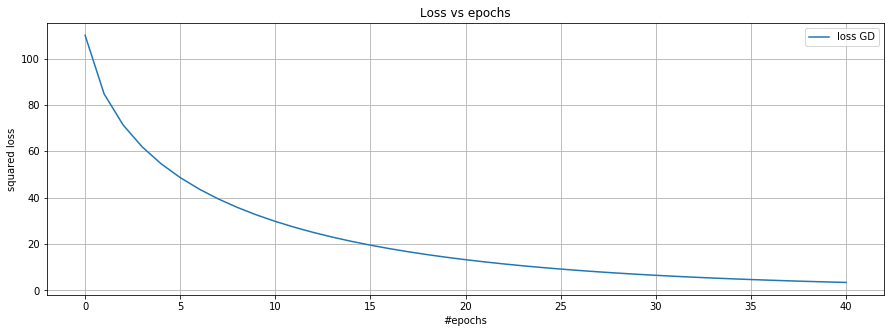

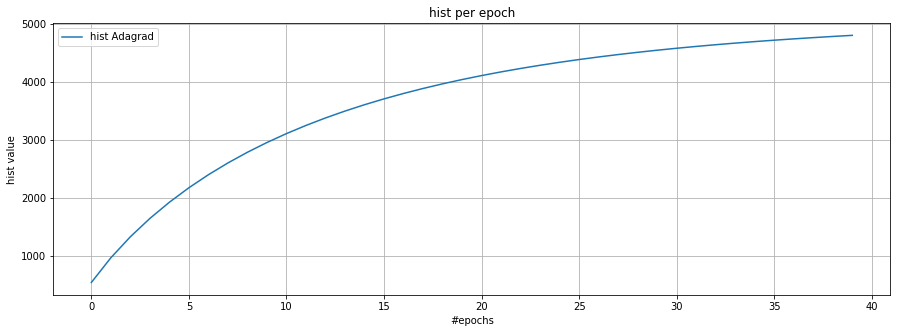

In [7]:
plot(epochs, loss_list, hist_list = hist_list)